<p style="text-align: right"> 29-09-2023 </p>

<center><img src= "carro.jpg" ></center>

<h1 style= "text-align: center; color:#566965"> Universidad Castro Carazo  </h1>
<h4 style= "text-align: center; color: #948a71"> 3C-2023 Analisis de Datos</h4
</br>
<p style="text-align: justify"> Este notebook contiene el analisis de datos de los vehiculo en venta en la empresa X ,
esta empresa se encuentra interesada en respoder una pregunta de negocios en particular, que es: </p>

<p style="font-weight: bold; text-align: center; color:#cc9476 "> Cuales son los autos que debo mover mas en el inventario?</p>

<p style="text-align: justify"> Para antender la pregunta de negocios, se han recolectado datos de los autos en el inventario, los cuales
estan disponibles en la siguiente enlace web: </p>

<table>
    <tr>
        <td><img src="buscar.png"></td>
        <td><a href="https://archive.ics.uci.edu/dataset/10/automobile"> Fuente de los Datos</a>
        </td>
        <td>
           <p>Este es un repositorio abierto para el uso del DataSet con proposito academico, siendo que 
en este podemos encontrar la data necesaria para generar el trabajo de este tercer cuatrimestre </p> 
        </td>
    </tr>
</table>


<h2 style= "text-align: center; color:#566965"> 1.Cargar y estandarización de los set de Datos  </h2>

<p style="font-weight: bold; text-align: justify; color:#cc9476 "> Se realiza la carga del set de datos para iniciar con la revision de la estructura y de esta forma lograr crear un data frame donde se consoliden las diferentes fuentes identificadas </p>

</ol>
    <li>Importa las librerias necesarias  </li>
    <li>Importar los archivos  CSV (set de datos/Data Frame </li>
    <li>Revisar los encabezados de los Data Frame </li>
    <li>Generar el Data Frame del Proyecto </li>
</ol>

<h2 style="color:#566965"> 1.1 Importa las librerias necesarias del proyecto  </h2>


In [1]:
import pandas as pd #Se usa para el manejo de los marcos de datos (data frame)
import numpy as np #Se usa para el manejo de estructura de datos (arrays, tuplas, diccionarios, etc)
import matplotlib.pyplot as plt #Se usa para generar las graficas
import matplotlib as mpl #es el matplotib puro 

<h2 style="color:#566965"> 1.2 Cargar el set de datos en Memoria  </h2>

In [2]:
cols=["symboling", "normalized", "make", "fuel", "aspiration", "doors", 
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"] # para agregar encabezados 
dfAutos01 = pd.read_csv ("autos.csv", names = cols)
dfAutos02 = pd.read_csv ("Autos1.csv", names = cols) 

In [3]:
dfAutos01.head(6) # primeros 6 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
dfAutos01.tail(6) #ultimos 6 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [5]:
dfAutos02 #mix de la data

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
5,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
6,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
7,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
8,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
9,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248


In [6]:
dfAutos01.shape # Para conocer el numero de filas y columnas

(197, 26)

In [7]:
dfAutos02.shape # Para conocer el numero de filas y columnas

(29, 26)

In [8]:
dfAutos01.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
dfAutos02.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,horsepower,peak,City,Higway,price
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.827586,100.103448,177.186207,66.134483,54.406897,2580.000000,128.000000,3.330690,3.402069,11.475862,102.413793,4970.689655,25.896552,31.448276,11692.793103
std,1.691765,3.082726,7.178327,0.917012,1.666676,310.887325,23.653752,0.240088,0.108278,5.318610,29.382353,448.910833,5.045117,5.803855,2906.059106
min,-2.000000,94.500000,159.300000,64.000000,51.400000,2209.000000,97.000000,3.010000,3.150000,8.500000,52.000000,4200.000000,19.000000,24.000000,7775.000000
25%,-1.000000,97.300000,171.700000,65.500000,53.000000,2300.000000,109.000000,3.190000,3.350000,9.000000,85.000000,4800.000000,24.000000,28.000000,9639.000000
50%,2.000000,100.400000,176.200000,66.500000,54.900000,2536.000000,122.000000,3.270000,3.400000,9.300000,92.000000,5200.000000,24.000000,30.000000,11199.000000
75%,2.000000,102.400000,183.100000,66.900000,55.700000,2912.000000,146.000000,3.620000,3.500000,9.500000,116.000000,5400.000000,27.000000,34.000000,13415.000000
max,3.000000,104.500000,188.800000,67.700000,57.500000,3151.000000,171.000000,3.780000,3.540000,23.000000,161.000000,5500.000000,37.000000,46.000000,17669.000000


In [10]:
dfAutos01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [11]:
dfAutos02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    29 non-null     int64  
 1   normalized   29 non-null     object 
 2   make         29 non-null     object 
 3   fuel         29 non-null     object 
 4   aspiration   29 non-null     object 
 5   doors        29 non-null     object 
 6   style        29 non-null     object 
 7   wheels       29 non-null     object 
 8   engine       29 non-null     object 
 9   base         29 non-null     float64
 10  length       29 non-null     float64
 11  width        29 non-null     float64
 12  heingt       29 non-null     float64
 13  curb         29 non-null     int64  
 14  engineType   29 non-null     object 
 15  Cylinders    29 non-null     object 
 16  engine-size  29 non-null     int64  
 17  system       29 non-null     object 
 18  bore         29 non-null     float64
 19  stroke    

<h2 style="color:#566965"> 1.3 Revisar los encabezados de los Data Frame  </h2> # Para que todos los data frame tenga los mismo encabezados es decir que sean identicos

In [12]:
dfAutos02.columns # para conocer el nombre de las columnas 

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [13]:
dfAutos01.columns # para conocer el nombre de las columnas 

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [14]:
dfAutos01.rename({'engine-size':'engineSize'}, axis=1, inplace=True) # para cambiar o igualar encabezados en ambos DF
dfAutos02.rename({'engine-size':'engineSize'}, axis=1, inplace=True) # para cambiar o igualar encabezados en ambos DF             

In [15]:
dfAutos01.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [16]:
dfAutos02.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h2 style="color:#566965"> 1.4 Unir los Data Frame  </h2>

In [17]:
unionArchivos=[dfAutos01,dfAutos02] # mediante un tupla los almacenos
dfAutos=pd.concat(unionArchivos) # con pandas los concateno
dfAutos.shape # solicito dimensiones

(226, 26)

In [18]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2 style= "text-align: center; color:#566965"> 2.Manejo de datos faltantes  </h2>

<p style="font-weight: bold; text-align: justify; color:#cc9476 ">  </p>

</ol>
    <li>Identificar como se muestra los valores faltantes  </li>
    <li>Contar la cantidad de valores faltantes en el set de datos </li>
    <li>Imputacion de los valores numericos </li>
    <li>Imputacion de los valores caracter </li>
    <li>Eliminar filas </li>
</ol>

<h2 style="color:#566965"> 2.1 Identificar los valores Faltantes  </h2>


In [19]:
dfAutos.replace ("?", np.nan , inplace=True) # reemplazar los signos de pregunta por NaN, para poder trabajarlos segun estandares de Python
dfAutos.head(6) # nos genera los 6 primeros registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h2 style="color:#566965"> 2.2 Contar la cantidad de valores faltantes en el set de dato  </h2>

In [20]:
dfTemp=dfAutos.isnull() #sirve para generar dos valores true o false, true aquellos campos con NaN, false todos los demas campos
dfTemp.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
for clumn in dfTemp.columns.values.tolist (): # recorro columna por columna para ir contando la cantidad de veces q aparece true y false, se interpreta que para cada coluna en el dfTemp.columns para posicionarme en las columnas.values para entrar a los valores.tolist para convertirlos en lista y se pueda contar hacemos
    print(clumn) # imprime el nombre de la columna
    print(dfTemp[clumn].value_counts()) # le decimos al dfTemp vaya a cada columns y me cuenta los valores
    print("") # para generar un espacio en la lista
           

symboling
symboling
False    226
Name: count, dtype: int64

normalized
normalized
False    180
True      46
Name: count, dtype: int64

make
make
False    226
Name: count, dtype: int64

fuel
fuel
False    226
Name: count, dtype: int64

aspiration
aspiration
False    226
Name: count, dtype: int64

doors
doors
False    224
True       2
Name: count, dtype: int64

style
style
False    226
Name: count, dtype: int64

wheels
wheels
False    226
Name: count, dtype: int64

engine
engine
False    226
Name: count, dtype: int64

base
base
False    226
Name: count, dtype: int64

length
length
False    226
Name: count, dtype: int64

width
width
False    226
Name: count, dtype: int64

heingt
heingt
False    226
Name: count, dtype: int64

curb
curb
False    226
Name: count, dtype: int64

engineType
engineType
False    226
Name: count, dtype: int64

Cylinders
Cylinders
False    226
Name: count, dtype: int64

engineSize
engineSize
False    226
Name: count, dtype: int64

system
system
False    226
Name: c

<h2 style="color:#566965"> 2.3 Imputacion de los valores numericos  </h2>

In [22]:
avNormalized =dfAutos['normalized'].astype("float").mean(axis=0) #creamos una variable, la cual nos va a calcular la media como tipo flotante de la columna (axis0) asi por cada una de la variables numericas
avPeak =dfAutos['peak'].astype("float").mean(axis=0)
avHorsepower =dfAutos['horsepower'].astype("float").mean(axis=0)
avBore =dfAutos['bore'].astype("float").mean(axis=0)
avStroke =dfAutos['stroke'].astype("float").mean(axis=0)

In [23]:
dfAutos["normalized"].replace(np.nan, avNormalized, inplace=True) # para la columna normalized, reemplaceme todo lo Nan por la media averiguada en avNormalized, y aplique la modificacion en el set de datos
dfAutos["peak"].replace(np.nan, avPeak, inplace=True)
dfAutos["horsepower"].replace(np.nan, avHorsepower, inplace=True)
dfAutos["bore"].replace(np.nan, avBore, inplace=True)
dfAutos["stroke"].replace(np.nan, avStroke, inplace=True)

In [24]:
dfAutos.head(6)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.283333,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.283333,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.283333,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h2 style="color:#566965"> 2.4 Imputación de los valores categóricos o tipo carácter  </h2>

In [25]:
dfAutos['doors'].value_counts().idxmax() #cuente en el set de datos en la variable carácter (para este caso doors), el valor que más se remita e indiquelo

'four'

In [26]:
dfAutos["doors"].replace(np.nan, 'four', inplace=True) # el código nos indica, de la variable doors, todo aquello que sea NaN reemplácelo por four y aplique la modificación en el set de datos

<h2 style="color:#566965"> 2.5 Eliminar observaciones (filas)  </h2>

In [27]:
dfAutos.dropna(subset = ['price'], axis=0, inplace=True) #Se indica al dfAutos que me borre los valores vacíos que están dentro de la columna Price, creando un variable (subset) que va a contener todos los datos de price( para ubicarlos en un índice) y se vaya trabajando por columnas y no por filas, para obtener el número de filas y eliminarlas, en otras palabras saque la columna de price completa y búsqueme los valores NaN y elimino los valores
dfAutos.reset_index(drop = True, inplace=True)  # actualizacion del indice una vez elimina las observaciones 

In [28]:
dfTemp=dfAutos.isnull()
for clumn in dfTemp.columns.values.tolist (): 
    print(clumn) 
    print(dfTemp[clumn].value_counts()) 
    print("") 

symboling
symboling
False    222
Name: count, dtype: int64

normalized
normalized
False    222
Name: count, dtype: int64

make
make
False    222
Name: count, dtype: int64

fuel
fuel
False    222
Name: count, dtype: int64

aspiration
aspiration
False    222
Name: count, dtype: int64

doors
doors
False    222
Name: count, dtype: int64

style
style
False    222
Name: count, dtype: int64

wheels
wheels
False    222
Name: count, dtype: int64

engine
engine
False    222
Name: count, dtype: int64

base
base
False    222
Name: count, dtype: int64

length
length
False    222
Name: count, dtype: int64

width
width
False    222
Name: count, dtype: int64

heingt
heingt
False    222
Name: count, dtype: int64

curb
curb
False    222
Name: count, dtype: int64

engineType
engineType
False    222
Name: count, dtype: int64

Cylinders
Cylinders
False    222
Name: count, dtype: int64

engineSize
engineSize
False    222
Name: count, dtype: int64

system
system
False    222
Name: count, dtype: int64

bore
b

In [29]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    222 non-null    int64  
 1   normalized   222 non-null    object 
 2   make         222 non-null    object 
 3   fuel         222 non-null    object 
 4   aspiration   222 non-null    object 
 5   doors        222 non-null    object 
 6   style        222 non-null    object 
 7   wheels       222 non-null    object 
 8   engine       222 non-null    object 
 9   base         222 non-null    float64
 10  length       222 non-null    float64
 11  width        222 non-null    float64
 12  heingt       222 non-null    float64
 13  curb         222 non-null    int64  
 14  engineType   222 non-null    object 
 15  Cylinders    222 non-null    object 
 16  engineSize   222 non-null    int64  
 17  system       222 non-null    object 
 18  bore         222 non-null    object 
 19  stroke  

<h2 style= "text-align: center; color:#566965"> 3.Estandarizacion de datos  </h2>


</ol>
    <li>Verificar el dominio de las variables  </li>
    <li>Convertir los valores numericos en funcion del dominio e interpretación  </li>
    <li>Normalizar datos entre 0 y 1 </li>
    <li>Creacion de rangos de valortes (Binning) </li>
</ol>

<h4 style="color:#566965"> 3.1 Verificar el dominio de las variables  </h4>

In [30]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    222 non-null    int64  
 1   normalized   222 non-null    object 
 2   make         222 non-null    object 
 3   fuel         222 non-null    object 
 4   aspiration   222 non-null    object 
 5   doors        222 non-null    object 
 6   style        222 non-null    object 
 7   wheels       222 non-null    object 
 8   engine       222 non-null    object 
 9   base         222 non-null    float64
 10  length       222 non-null    float64
 11  width        222 non-null    float64
 12  heingt       222 non-null    float64
 13  curb         222 non-null    int64  
 14  engineType   222 non-null    object 
 15  Cylinders    222 non-null    object 
 16  engineSize   222 non-null    int64  
 17  system       222 non-null    object 
 18  bore         222 non-null    object 
 19  stroke  

In [31]:
dfAutos[["normalized"]] = dfAutos[["normalized"]].astype("int") # para cambiar una varibles de dominio es decir de object a Int
dfAutos[["price","horsepower","peak" ]] = dfAutos[["price" , "horsepower","peak" ]].astype("int") # para cambiar mas de una variable de dominio, de objet a int
dfAutos[["bore" , "stroke" ]] = dfAutos[["bore" , "stroke" ]].astype("float") # para cambiar mas de una variable de dominio, de objet a float

In [32]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    222 non-null    int64  
 1   normalized   222 non-null    int32  
 2   make         222 non-null    object 
 3   fuel         222 non-null    object 
 4   aspiration   222 non-null    object 
 5   doors        222 non-null    object 
 6   style        222 non-null    object 
 7   wheels       222 non-null    object 
 8   engine       222 non-null    object 
 9   base         222 non-null    float64
 10  length       222 non-null    float64
 11  width        222 non-null    float64
 12  heingt       222 non-null    float64
 13  curb         222 non-null    int64  
 14  engineType   222 non-null    object 
 15  Cylinders    222 non-null    object 
 16  engineSize   222 non-null    int64  
 17  system       222 non-null    object 
 18  bore         222 non-null    float64
 19  stroke  

In [33]:
dfAutos.describe() # despues de realizar los cambio de dominios,podemos ver todos los datos numericos y corroborar los minimos y maximos de cada uno de los datos con la metadata

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,compression,horsepower,peak,City,Higway,price
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.320125,3.280243,10.323514,102.180180,5093.468468,25.445946,30.990991,12780.941441
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258977,0.305002,4.179231,36.334344,481.973832,6.272417,6.701787,7530.446820
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,8.625000,70.000000,4800.000000,20.250000,25.000000,7898.000000
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,9.400000,116.000000,5500.000000,30.000000,34.000000,15628.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
dfAutos.to_excel ("exportararchivo.xlsx") # nos sirve para exportar el archivo en excell, segun el nombre que le indiquemos, me henera el archivo en la carpeta donde esta el proyecto

In [35]:
dfAutos.iloc[1] # me filtra la primera fila y todas las columnas

symboling                3
normalized             122
make           alfa-romero
fuel                   gas
aspiration             std
doors                  two
style          convertible
wheels                 rwd
engine               front
base                  88.6
length               168.8
width                 64.1
heingt                48.8
curb                  2548
engineType            dohc
Cylinders             four
engineSize             130
system                mpfi
bore                  3.47
stroke                2.68
compression            9.0
horsepower             111
peak                  5000
City                    21
Higway                  27
price                16500
Name: 1, dtype: object

In [36]:
dfAutos.iloc[:1 ,:] # me filtra la primera fila y todas las columnas

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [37]:
dfAutos.head(5) #me genera los primeros 5 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
dfAutos.iloc[:5,:] #me genera los primeros 5 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
dfAutos.iloc[0:5,:] #me genera los primeros 5 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
dfAutos.iloc[0:5,:3] #me genera los primeros 5 registros, de las primeras 3 columnas

,symboling,normalized,make
0,3,122,alfa-romero
1,3,122,alfa-romero
2,1,122,alfa-romero
3,2,164,audi
4,2,164,audi


In [41]:
dfAutos.iloc[:,[0,2,1]]#me genera todas las filas, pero solo cierta columnas y en el orden que se las indico 0,2,1

,symboling,make,normalized
0,3,alfa-romero,122
1,3,alfa-romero,122
2,1,alfa-romero,122
3,2,audi,164
4,2,audi,164
...,...,...,...
217,0,volkswagen,122
218,0,volkswagen,122
219,-2,volvo,103
220,-1,volvo,74


In [42]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
#dfTemp=dfAutos.loc[:,"normalized"] == 65 # nos quiere decir en df nuevo temporal, de la colunma normalized, extraer todo aquello q es igual a 65 verdadero o falso
#dfTemp.head(5) # importar las 5 primeros registros

In [44]:
#dfTemp=dfAutos.loc[:,"normalized"] == 65 # nos quiere decir en df nuevo temporal, de la colunma normalized, extraer todo aquello q es igual a 65, verdadero o falso
#dfTemp=dfAutos.loc[dfTemp] # me extrae los filas y valores donde mi nomalized es igual a 65
#dfTemp.head(5) # importar las 5 primeros registros
#dfTemp.to_excel("igualesa65.xlsx") #exporto a Excel los registros que cumplan con lo indicado, es decir que sean iguales a 65


<h2 style= "text-align: center; color:#566965"> 3.2 Convertir los valores numericos en funcion del medio (estandarizar) </h2>

In [45]:
dfAutos["City(L/100km (calc)"] = 235.21 / dfAutos["City"] # nos agregar un columna mas a nuestro dfAutos con el calculo realizado para cambiar de mpg a Lkg
dfAutos["Higway(L/100km (calc)"] = 235.21 / dfAutos["Higway"]
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City(L/100km (calc),Higway(L/100km (calc)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,11.200476,8.711481
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.200476,8.711481
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.379474,9.046538
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.800417,7.840333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,13.067222,10.691364


<h2 style= "text-align: center; color:#566965"> 3.3 Normalizar valores entre 0 y 1 </h2>

In [46]:
dfTemp=dfAutos[["length" , "heingt"]] # Creamos un temporal para ver las columnas que vamos a comprarar
dfTemp.head(4)

,length,heingt
0,168.8,48.8
1,168.8,48.8
2,171.2,52.4
3,176.6,54.3


In [47]:
dfAutos["length (norm)"]=dfAutos["length"]/dfAutos["length"].max() # se crea una nueva variable llamada length (norm), la cual va ser igual a dividir la variables entre el monto maximo de la variable, para sacar el monto entre los rangos 0 y 1
dfAutos["heingt (norm)"]=dfAutos["heingt"]/dfAutos["heingt"].max()
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,compression,horsepower,peak,City,Higway,price,City(L/100km (calc),Higway(L/100km (calc),length (norm),heingt (norm)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495,11.200476,8.711481,0.811148,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500,11.200476,8.711481,0.811148,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500,12.379474,9.046538,0.822681,0.876254
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950,9.800417,7.840333,0.848630,0.908027


In [48]:
dfTemp=dfAutos[["length" , "heingt" ,"length (norm)" , "heingt (norm)" ]] 
dfTemp.head(4)

,length,heingt,length (norm),heingt (norm)
0,168.8,48.8,0.811148,0.816054
1,168.8,48.8,0.811148,0.816054
2,171.2,52.4,0.822681,0.876254
3,176.6,54.3,0.848630,0.908027


<h2 style= "text-align: center; color:#566965"> 3.4 Crear Grupos o Categorias (Binning) </h2>

In [49]:
dfTemp=dfAutos["horsepower"] # por ejemplo vamos a categorizar la variable horsepower, 
dfTemp.describe() # describe nos vuelve a indicar los max y min para toma de decisiones 

count    222.000000
mean     102.180180
std       36.334344
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [50]:
bins=np.linspace(48,262,4) #linspace nos solicita tres parámetros, minimo, maximo y un numero de categoria
bins # para imprimir, el resultado va en tres grupos de 48 a 119 de 119 a 190 y de 190 a 262

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [51]:
bins=np.linspace(min(dfAutos["horsepower"]),max(dfAutos["horsepower"]),4 ) # sino conocemos los max y minimos, podemos usar el codigo para buscar el max, min y categoria de la variable
bins # para imprimir, el resultado va en tres grupos de 48 a 119 de 119 a 190 y de 190 a 262

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [52]:
categorias=["bajo", "medio" , "alto" ] # creo una tupla, la misma debe ir en mismo orden del bins (bajo, medio, alto)
dfAutos["horsepower(Bins)"]=pd.cut(dfAutos["horsepower"], bins, labels=categorias, include_lowest=True) #creamos una nueva variables horsepower(Bins), la cual va ser igual a decir a pandas q me corte la variable horsepower (np.cut), que me corte en funcion de los bins (4), que nombre le voy a poner lo cual se identifica con los labels que es igual a categorias y que me incluta el menor valor
dfTemp=dfAutos[["horsepower" , "horsepower(Bins)"]] # me trae la columna original y le nueva columna
dfTemp.head(5)

,horsepower,horsepower(Bins)
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


In [53]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City(L/100km (calc),Higway(L/100km (calc),length (norm),heingt (norm),horsepower(Bins)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495,11.200476,8.711481,0.811148,0.816054,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500,11.200476,8.711481,0.811148,0.816054,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500,12.379474,9.046538,0.822681,0.876254,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950,9.800417,7.840333,0.848630,0.908027,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450,13.067222,10.691364,0.848630,0.908027,bajo


<h2 style= "text-align: center; color:#566965"> 4.Visualizacion de datos </h2>

<h3 style= "text-align: color:#566965"> En este apartado se van a crear diferentes visualizaciones de datos (graficas),las cuales nos ayudan a realizar la interpretacion y analisis de la informacion del set</h3>


<h3 style= "text-align: color:#566965"> Estos son tres elementos fundamentales para poder crear las visualizaciones </h3>

</ol>
    <li>Preguntas del Negocio a Responder  </li>
    <li>Pleno conocimiento del set de datos  </li>
    <li>Experiencia de negocio </li>
    

In [54]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City(L/100km (calc),Higway(L/100km (calc),length (norm),heingt (norm),horsepower(Bins)
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495,11.200476,8.711481,0.811148,0.816054,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500,11.200476,8.711481,0.811148,0.816054,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500,12.379474,9.046538,0.822681,0.876254,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950,9.800417,7.840333,0.848630,0.908027,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450,13.067222,10.691364,0.848630,0.908027,bajo


In [59]:
#Parametros de la grafica
mpl.rcParams["axes.spines.bottom"] = True #le estos diciendo que con respecto a la linea q esta abajo de la grafica me la deje habilitada
mpl.rcParams["axes.spines.left"] = False # deshabilite la linea de la izquierda de la grafica
mpl.rcParams["axes.spines.right"] = False # deshabilite la linea de la derecha de la grafica
mpl.rcParams["axes.spines.top"] = False #deshabilite la linea de arriba de la grafica 
# una vez que hagamos esta configuracion se aplica para todos los graficos de aqui en adelante

<h3 style= "text-align: color:#566965"> Cual es la cantidad de autos segun el fabricante? </h3>

In [62]:
 # debemos agrupar los valores para sabe q cantidad tenemos, utilizamos groupby
gf= dfAutos.groupby(["make"]).count() #me cuenta los valores de las variables que tenemos numero de observaciones
gf.head(3)

,symboling,normalized,fuel,aspiration,doors,style,wheels,engine,base,length,...,horsepower,peak,City,Higway,price,City(L/100km (calc),Higway(L/100km (calc),length (norm),heingt (norm),horsepower(Bins)
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [64]:
gf= dfAutos.groupby(["make"]).count()
gf= gf.iloc [:, :1] # el iloc me permite seleccion columnas y filas del data set, se compone de dos parametros los primeros corresponde a las filas, y los segundos a las columnas, en el codigo le estamos diciendo elijame todos las filas, y uniamente la columna 0 y 1
gf.head(5)

,symboling
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9


In [69]:
gf= dfAutos.groupby(["make"]).count()
gf= gf.iloc [:, :1] # el iloc me permite seleccion columnas y filas del data set, se compone de dos parametros los primeros corresponde a las filas, y los segundos a las columnas, en el codigo le estamos diciendo elijame todos las filas, y uniamente la columna 0 y 1
gf= gf.sort_values("symboling",ascending= False) # nos sirve para ordenar los valores de forma ascendente, si colocamos false me lo ordena de forma desendente
gf

,symboling
make,
toyota,46
volkswagen,24
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
peugot,11
dodge,9


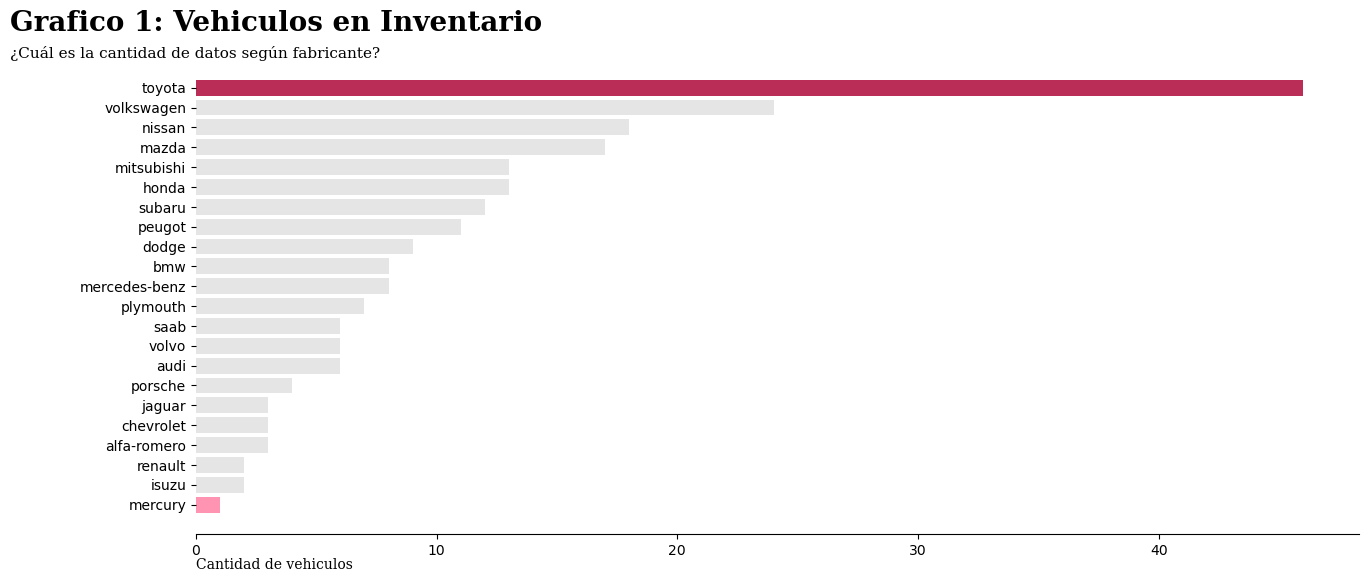

In [73]:
fig, ax = plt.subplots(1,1, figsize = (15,6.9), dpi=100) # para crear subgraficos, el 1,1 quieres decir q toma de vertice a vertice es decir todo el grafico, el figsize es el tamaño se recomienda los valores indicados en (), el dpi que son los pixelesde la figura sea = a 100
 
# Datos a graficar
make = gf.index.tolist() # me convierte la columna make en una lista, donde estan las marcas, en el mismo orden que tengo en la tabla, lo anterior me sirve para cuando debo de volver a actualizar mis datos dentro unos un trimestre a semestre con datos nuevo del mercado
y_pos = np.arange(len(make)) # me indica la posicion que van a tomar los valores, en este caso seria el eje de la "y"
 
cant = gf['symboling'].tolist() # me convierte la columna symboling en una lista
 
# Arreglo de colores
barColors = ['#b92d56','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
             '#e5e5e5','#e5e5e5','#e5e5e5','#ff94b2'] # para pintar la barra de colores, segun metodo pretentivo lo que hacemos como ejemplo colocar colores diferentes a los autos que mas se venden y a los que menos se vender,para todas las demas barras le asignamos un mismo color.
# lo que sucede es que YO pinto las barras del color q deseo, pero debo pintar barra por barra, para mi ejemplo son 22 barras por lo cual debo indicar 22 codigos de color 

# Generacion del grafico

ax.barh(y_pos, cant, align='center', color = barColors) # los valores con que se llena los ejes X (cant), Y (y_pos), Colocacion de las variabales ( align='center')  y para pintar las baras colocamos color= a mi barra de colores q defini anterior mente
ax.set_yticks(y_pos, labels=make) # es para los nombre se alimentan de ypos, cant
ax.invert_yaxis()  # labels read top-to-bottom # invierte el orden del graficos en la barra Y, puede ser ascendente o desendente, solo se comenta para dar otro efecto.


#-----------------------------------------------------------------------------------------------------------------------------#
#-----------------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS, EJES DEL GRAFICO--------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------#
#formato del titulo
 
title = "Grafico 1: Vehiculos en Inventario"  # Creo variable Para colocar el titulo al grafico
plt.suptitle(title, 
            horizontalalignment = 'left', # para darle un orientacion al titulo,  para este caso a la izquierda
            x = 0.001, # coordenas en x, por defaul 0.001 de los margenes
            y = 0.87, # coordenada en Y  por defaul 0.87 margen del maquina y el lienzo
            transform = fig.transFigure, #es para convertir a una figura en un lienzo pegado, pero me toma cada componente independiente 
            fontsize = 20, # tamano de la letra
            fontweight = "bold", # forma a la letra si va en negrita, oblicua etc, para nuestro caso va en negrita
            fontfamily = "serif") # seria el tipo de letra, se recomienda usar el serif por temas de compatibilidad
 
#formato del subtitulo
stitle = "¿Cuál es la cantidad de datos según fabricante?" #creo variable Para colocar un subtitulo
ax.set_title(stitle, 
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.80, #coordenada en Y  por defaul 0.80 para que quede abajo del titulo
            transform = fig.transFigure,
            fontsize = 11,
            fontweight = "regular", # tipo de letra regular
            fontfamily = "serif")
 
#formato del eje X
etiqueta = "Cantidad de vehiculos" # creo variable Para colocar un titulo en el eje X
ax.set_xlabel(etiqueta,
             ha = 'left', # por se etiqueta se coloca ha
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif") 
 
#Configuracion de coordenadas de la etique del eje x
ax.xaxis.set_label_coords(x=0, y= -0.05, transform= ax.transAxes) # para colocar el titulo de la etiquela en la pantalla ( se maneja +10 * -10)
 
#configuracion del tamano
ax.tick_params(axis='both', 
               labelsize = 10) # etiqueta salga abajo 
 
#Configuracion de la ubicacion del grafico
plt.subplots_adjust(top=0.80)# ajusta la ubicacion del grafico en la pantalla
 
 
plt.show() # tenerlo activado para q me muestre la grafica

# si lo quiero guardar en word, lo copio y pego, y jupiter lab no nos deja copiar, abrimos jupiter notebook, corremos y damos clip derecho y copiar y pegar, cuando lo copiamos no se nos va a pixelear


<h3 style= "text-align: color:#566965"> Cual es la relacion existente entre el tamaño del motor y el consumo de combustible </h3>

# por se relacion de dos varibales puedo obviar este codigo 
gf= dfAutos.groupby(["engineSize"]).count()
gf= gf.iloc [:, :1] # el iloc me permite seleccion columnas y filas del data set, se compone de dos parametros los primeros corresponde a las filas, y los segundos a las columnas, en el codigo le estamos diciendo elijame todos las filas, y uniamente la columna 0 y 1
gf= gf.sort_values("symboling",ascending= False) # nos sirve para ordenar los valores de forma ascendente, si colocamos false me lo ordena de forma desendente
gf

In [81]:
dfAutos.shape

(222, 31)

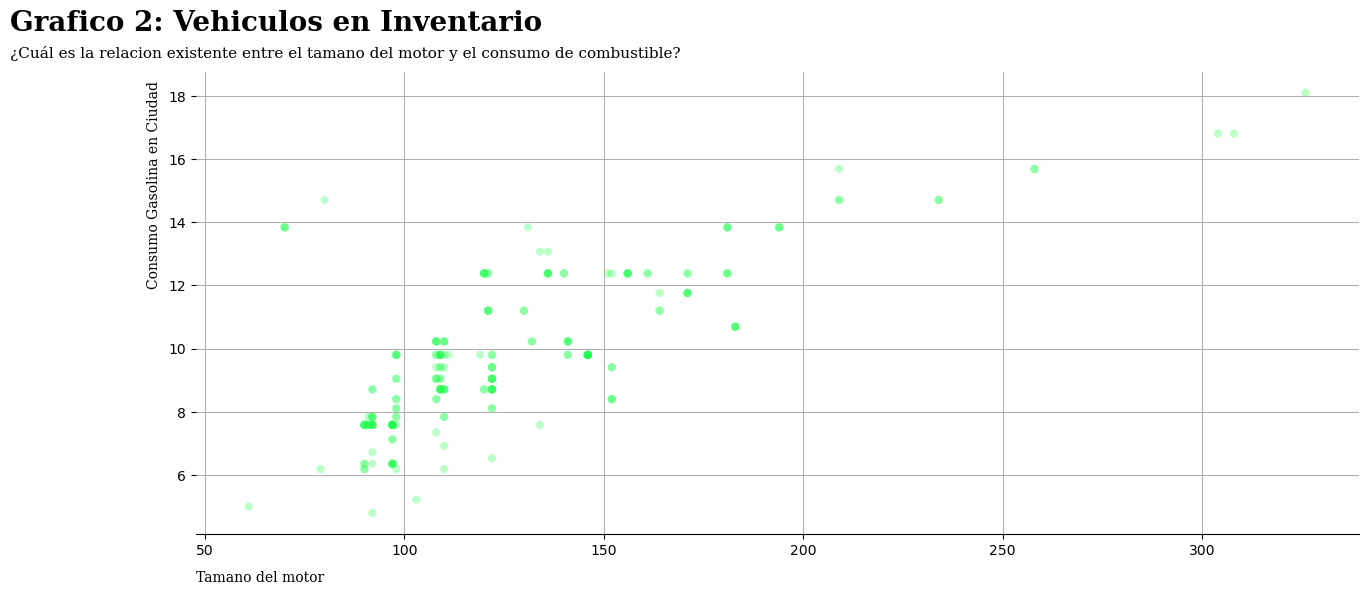

In [82]:
fig, ax = plt.subplots(1,1, figsize = (15,6.9), dpi=100) # la configuracion del mismo grafico anterior
 
n = 222 # numero de observaciones que debo graficar, poblacion total de registros
x = dfAutos['engineSize'] # dato asociados a la variable X
y = dfAutos['City(L/100km (calc)'] # dato asociado a la varibale Y
 
ax.scatter(x, y, c='#21ff4f', alpha=0.3, edgecolors='none') # es el codigo que me dibuja el grafico, se alimenta de los datos que le indico en las variables
#c igual un  color de la paleta, alpha =  , edgecolor= son colores aleatorios
ax.grid(True) # me pinta la cuadricula
 
#-----------------------------------------------------------------------------------------------------------------------------#
#-----------------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS, EJES DEL GRAFICO--------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------#
#formato del titulo
 
title = "Grafico 2: Vehiculos en Inventario"
plt.suptitle(title,
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.87,
            transform = fig.transFigure,
            fontsize = 20,
            fontweight = "bold",
            fontfamily = "serif")
 
#formato del subtitulo
stitle = "¿Cuál es la relacion existente entre el tamano del motor y el consumo de combustible? "
ax.set_title(stitle,
            horizontalalignment = 'left',
            x = 0.001,
            y = 0.80,
            transform = fig.transFigure,
            fontsize = 11,
            fontweight = "regular",
            fontfamily = "serif")
 
#formato del eje X
etiqueta = "Tamano del motor"
ax.set_xlabel(etiqueta,
             ha = 'left',
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif")
 
#formato del eje Y
etiqueta_y = "Consumo Gasolina en Ciudad"
ax.set_ylabel(etiqueta_y,
             ha = 'left',
             fontsize = 10,
             fontweight = "regular",
             fontfamily = "serif")
 
#Configuracion de coordenadas de la etique del eje x - y
ax.xaxis.set_label_coords(x=0, y= -0.08, transform= ax.transAxes) # para modificar las coordenadas el eje x
ax.yaxis.set_label_coords(x=-0.03, y= 0.53, transform= ax.transAxes) # para modificar las coordenadas el eje y, se recomiendo usar 0.03 y 0.45 y empezar ajustar
 
#configuracion del tamano
ax.tick_params(axis='both', 
               labelsize = 10)
 
#Congiruacion de la ubicacion del grafico
plt.subplots_adjust(top=0.78)
 
 
plt.show()
